In [3]:
import pandas as pd

In [5]:
ev_data = pd.read_csv("C:\\Users\\ranap\\OneDrive\\Desktop\\EV\\EV-data\\Electric_Vehicle_Population_Data.csv")

In [6]:
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [9]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [12]:
ev_data = ev_data.dropna()

C:\Users\ranap\AppData\Local\Temp\ipykernel_12932\3934100653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette=("viridis"))


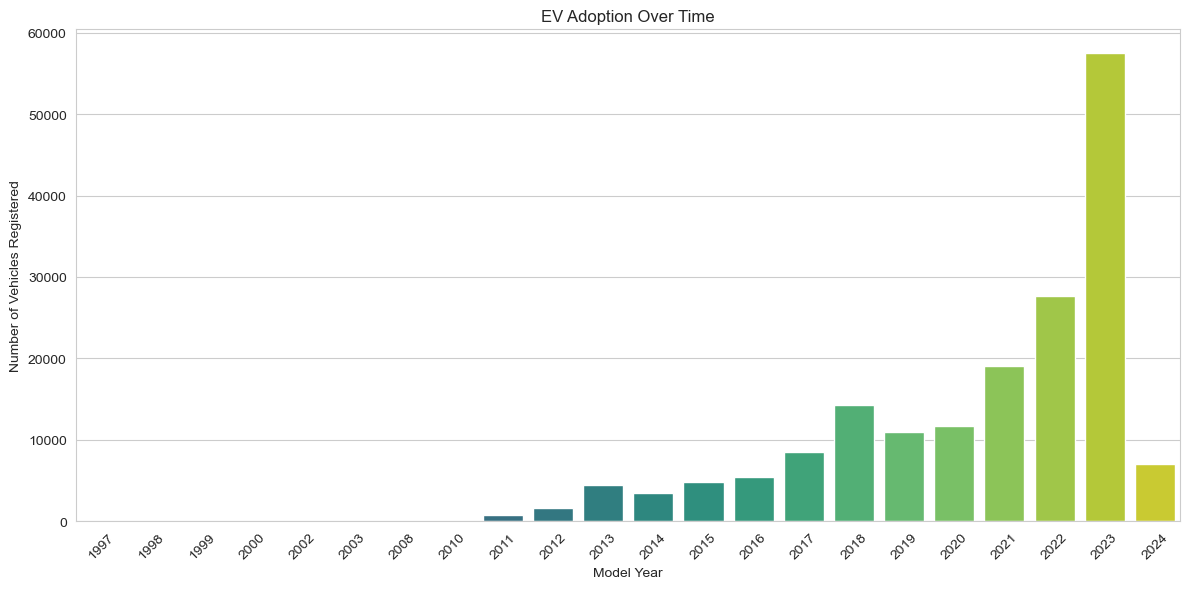

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Ev Adoption over time

plt.figure(figsize =(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette=("viridis"))
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Registered")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

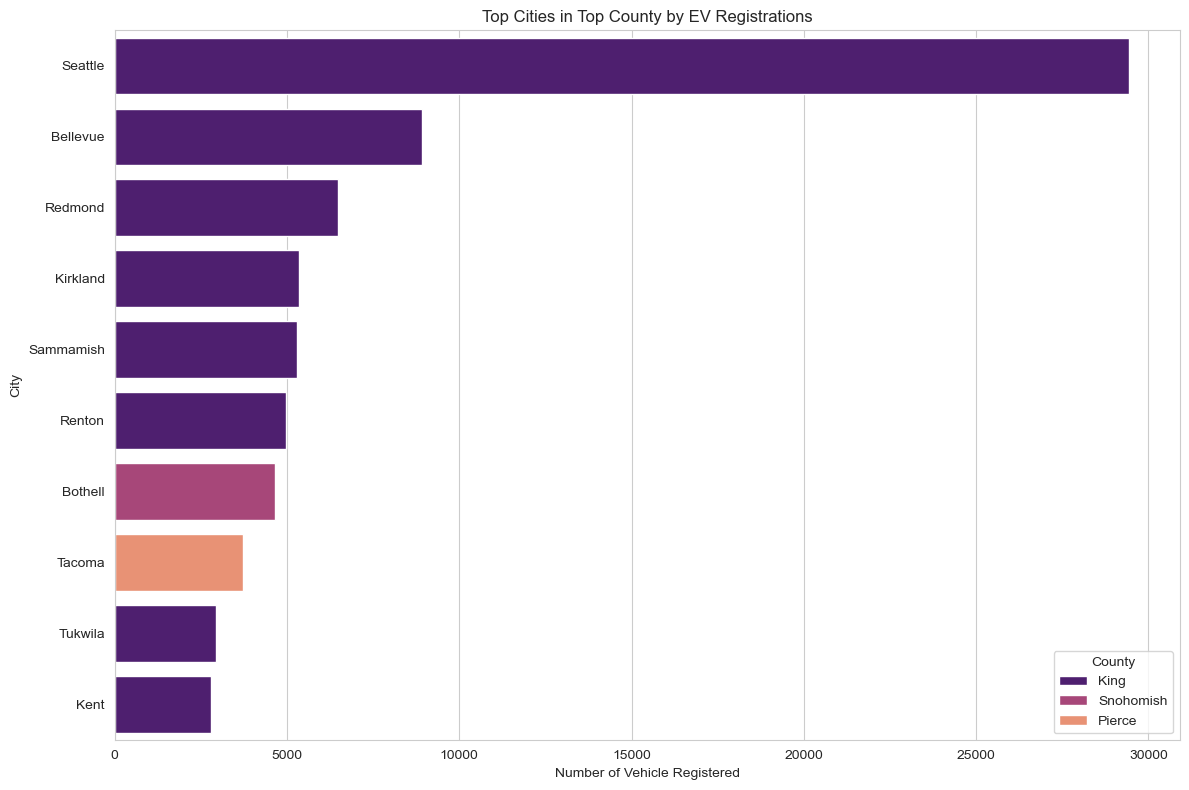

In [16]:
#geographical distribution at country level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#filtering the dataset using these 3 counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

#analyzing the distribution of EV's within the cities using these counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#visualizing top 10 cities under these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y= 'City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top County by EV Registrations')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

C:\Users\ranap\AppData\Local\Temp\ipykernel_12932\2092207148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y = ev_type_distribution.index, palette="rocket")


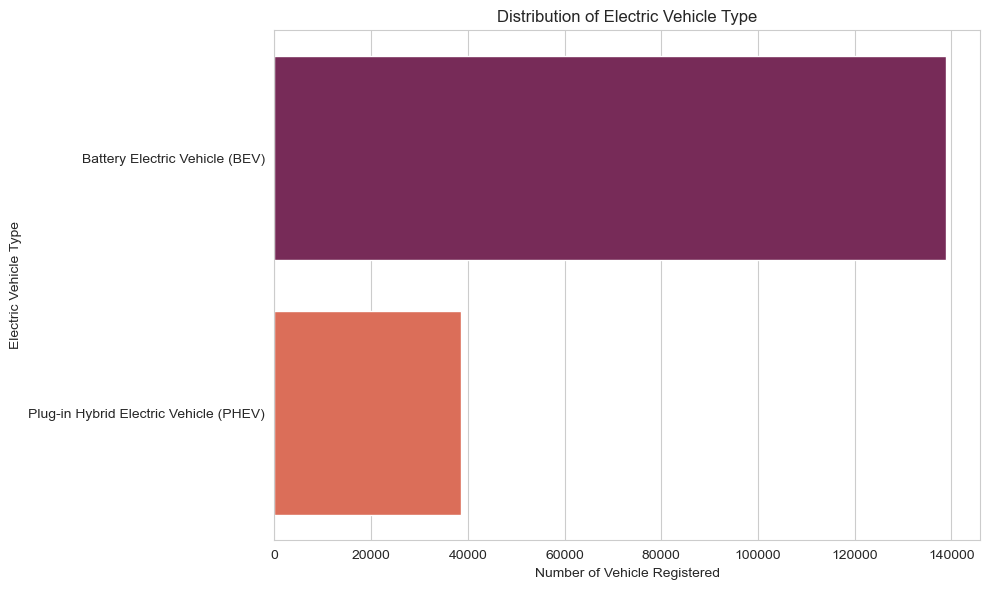

In [17]:
#analyzing the distribution of electric vehicle type
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y = ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

C:\Users\ranap\AppData\Local\Temp\ipykernel_12932\24800907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y = ev_make_distribution.index, palette="cubehelix")


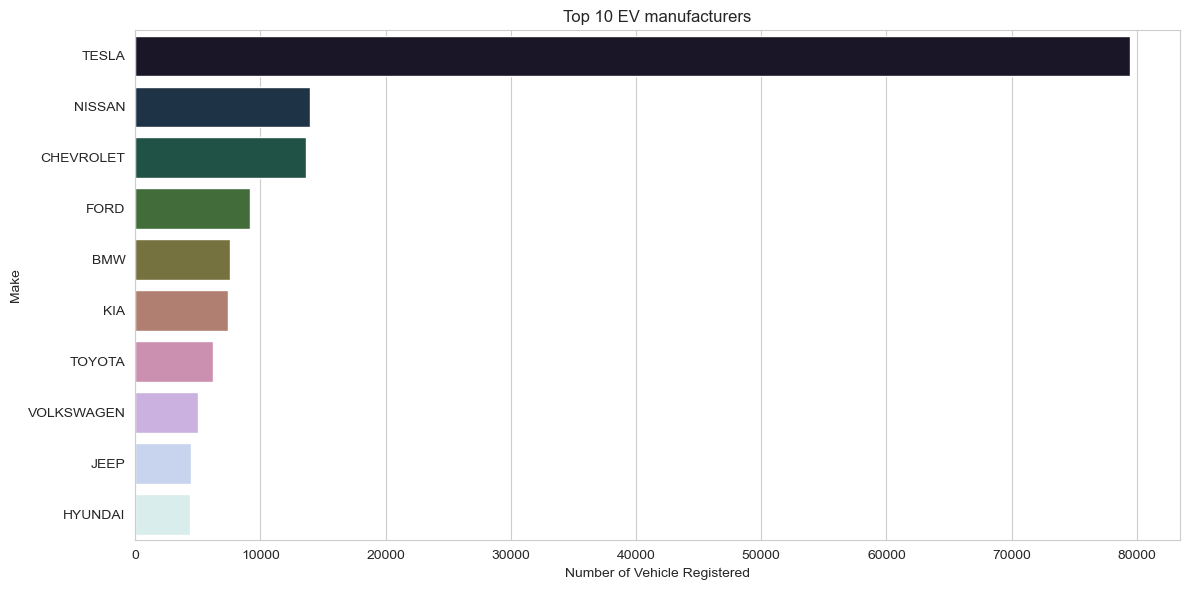

In [18]:
#Analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y = ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 EV manufacturers')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

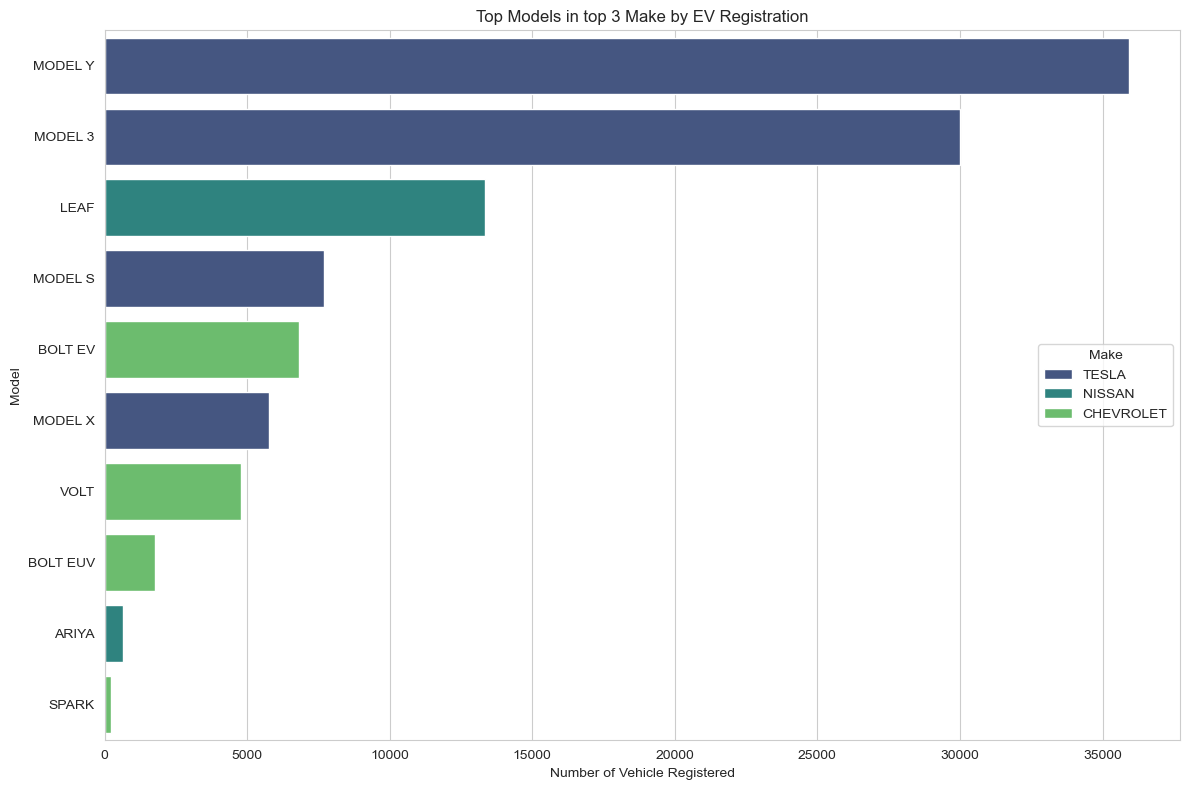

In [19]:
#Selecting the top 3 manufacturers based on the Vehicle Registered
top_3_makes = ev_make_distribution.head(3).index

#filtering the dataset for these manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

#analyzing the popularity of EV Models based on these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().reset_index(name='Number of Vehicles')

#Visualizing the top 10 models across these manufactures for clarity
top_models = ev_model_distribution_top_makes.sort_values(by='Number of Vehicles',ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y= 'Model', hue='Make', data = top_models, palette = "viridis")
plt.title('Top Models in top 3 Make by EV Registration')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc= 'center right')
plt.tight_layout()
plt.show()

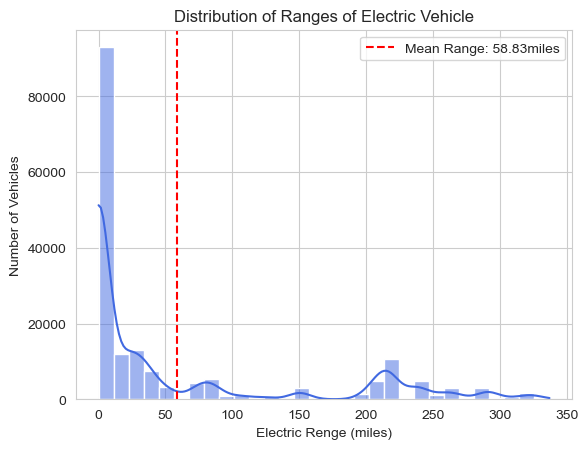

In [20]:
#Analyzing the distribution of electric ranges
plt.figure(figure=(12,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Ranges of Electric Vehicle')
plt.xlabel('Electric Renge (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle = '--', label=f'Mean Range: {ev_data['Electric Range'].mean():.2f}miles')
plt.legend()
plt.show()

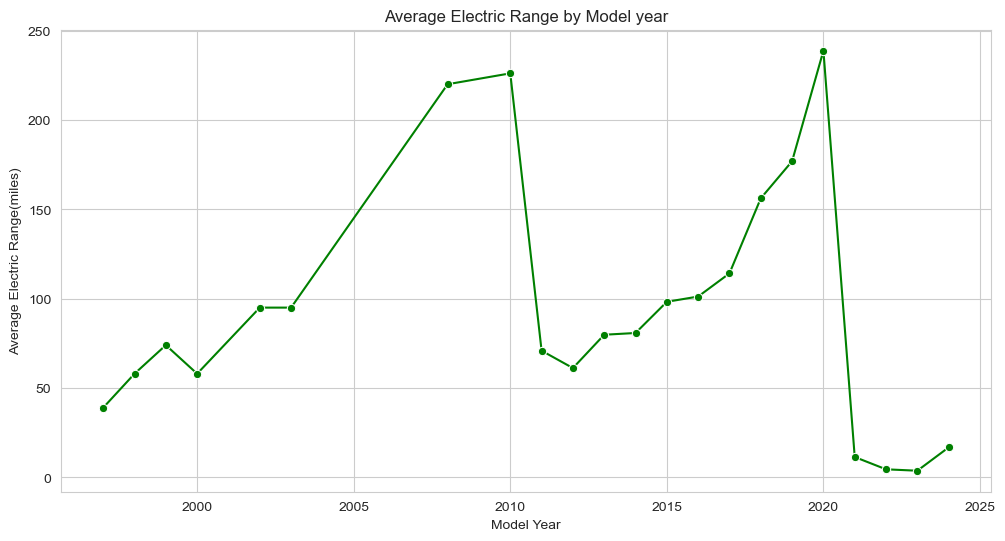

In [21]:
#calculating the average range of electric by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color= 'green')
plt.title('Average Electric Range by Model year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range(miles)')
plt.grid(True)
plt.show()

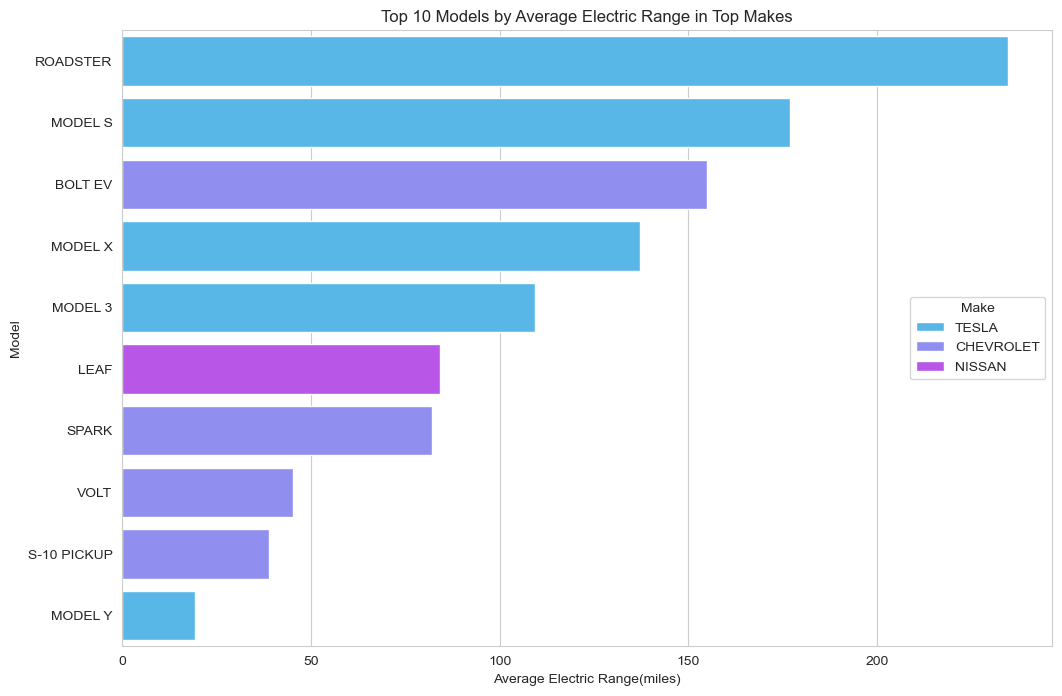

In [22]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

#the top 10 model with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12,8))
barplot= sns.barplot(x='Electric Range', y='Model', hue= 'Make', data= top_range_models, palette = "cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range(miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.show()

In [34]:
#Calculating the EV's registered every year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [44]:
from  scipy.optimize import curve_fit
import numpy as np

#filters the dataset to include years with complete data, assuming 2023 is the last year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

#define a function for exponential growth to fit the data
def exp_growth(x,a,b):
    return a * np.exp(b * x)

#prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

#fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

#Use the fitted function to forecast the number of EV's for 2024 and next five Year_
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params) 

#create the dictonary to display the forecasted the values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


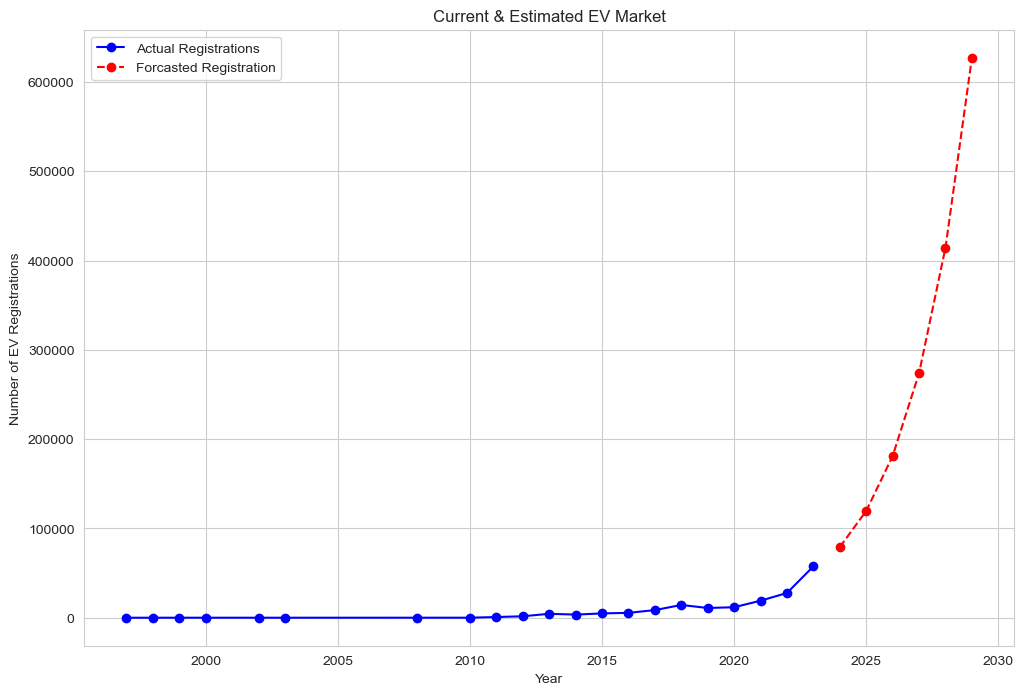

In [46]:
#prepare data for plotting 
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

#Actual and forecasted Values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year]for year in forecast_years_full]

plt.figure(figsize = (12,8))
plt.plot(actual_years, actual_values, 'bo-', label = 'Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label = 'Forcasted Registration')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()